# Perparing Data for Training

This notebook will demonstrate step by step to fetch historical data and generate sythetic data for training RL model. Why sythethic? Synthethic data is necessary to remove market bias of a trending historical data that will be reflected on the training result by the next notebook.

Steps:
1. Download binance data
2. Convert into pandas dataframe
3. Generate sythetic data based on the historical price movement

In [1]:
# Download Binance Data
from src.libs import binance, read_df

# download parameters 
symbols = ['DOGEUSDT']
freqs = {'5m': 5 }
start_date = '2024-01-01'
trade_date = '2024-02-01'
end_date = '2024-03-28'
date_range = f"{start_date}_{end_date}"
market_type = 'um'

# execute download
binance.download_klines(symbols, freqs, start_date, end_date, market_type)

# read dataframes
list_df = read_df.read2df(symbols, freqs, market_type, date_range)
list_df[0]

Found 1 symbols
[1/1] - start download monthly DOGEUSDT klines 

file already exists! /Users/kevin/Documents/Github/rl-trading-notebook/binance-public-data/python/data/futures/um/monthly/klines/DOGEUSDT/5m/2024-01-01_2024-03-28/DOGEUSDT-5m-2024-01.zip

file already exists! /Users/kevin/Documents/Github/rl-trading-notebook/binance-public-data/python/data/futures/um/monthly/klines/DOGEUSDT/5m/2024-01-01_2024-03-28/DOGEUSDT-5m-2024-02.zip

file already exists! /Users/kevin/Documents/Github/rl-trading-notebook/binance-public-data/python/data/futures/um/monthly/klines/DOGEUSDT/5m/2024-01-01_2024-03-28/DOGEUSDT-5m-2024-03.zip


/Users/kevin/Documents/Github/rl-trading-notebook/src/libs/read_df.py:64: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df['datetime'] = pd.to_datetime(df['time'], unit='ms',  errors = 'coerce')


,time,open,high,low,close,volume,tic,itvl,datetime
0,1704067499999,0.08958,0.08983,0.08954,0.08982,13389339,DOGEUSDT,5m,2024-01-01 00:04:59.999
1,1704067799999,0.08982,0.08993,0.08979,0.08988,9289501,DOGEUSDT,5m,2024-01-01 00:09:59.999
2,1704068099999,0.08989,0.08995,0.08980,0.08984,13032096,DOGEUSDT,5m,2024-01-01 00:14:59.999
3,1704068399999,0.08984,0.08992,0.08978,0.08978,9527089,DOGEUSDT,5m,2024-01-01 00:19:59.999
4,1704068699999,0.08979,0.08998,0.08977,0.08994,10328501,DOGEUSDT,5m,2024-01-01 00:24:59.999
...,...,...,...,...,...,...,...,...,...
26203,1711928399999,0.22098,0.22149,0.22094,0.22128,27356801,DOGEUSDT,5m,2024-03-31 23:39:59.999
26204,1711928699999,0.22127,0.22141,0.22058,0.22102,22772555,DOGEUSDT,5m,2024-03-31 23:44:59.999
26205,1711928999999,0.22101,0.22110,0.22020,0.22049,19836923,DOGEUSDT,5m,2024-03-31 23:49:59.999
26206,1711929299999,0.22049,0.22064,0.21984,0.21991,16964289,DOGEUSDT,5m,2024-03-31 23:54:59.999


/Users/kevin/Documents/Github/rl-trading-notebook/src/libs/plot.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['datetime'] = pd.to_datetime(data['datetime'])


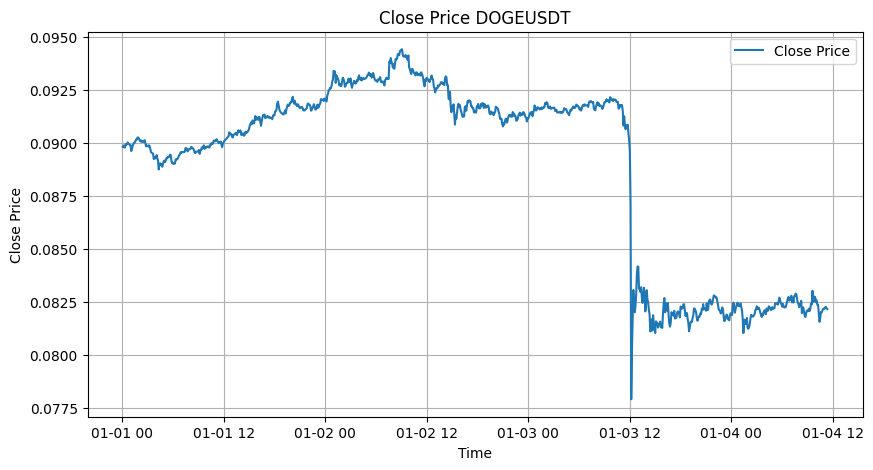

In [2]:
from src.libs import plot

# Load and display data
_, _, data = read_df.split_into_train_test(list_df, start_date, trade_date, end_date)
plot.plot_close_price(symbols[0], data[0][0:1000])

## Generate Synthetic Price

- [x] Sideways price
- [ ] Sinewave price
- [ ] Jagged sinewave price

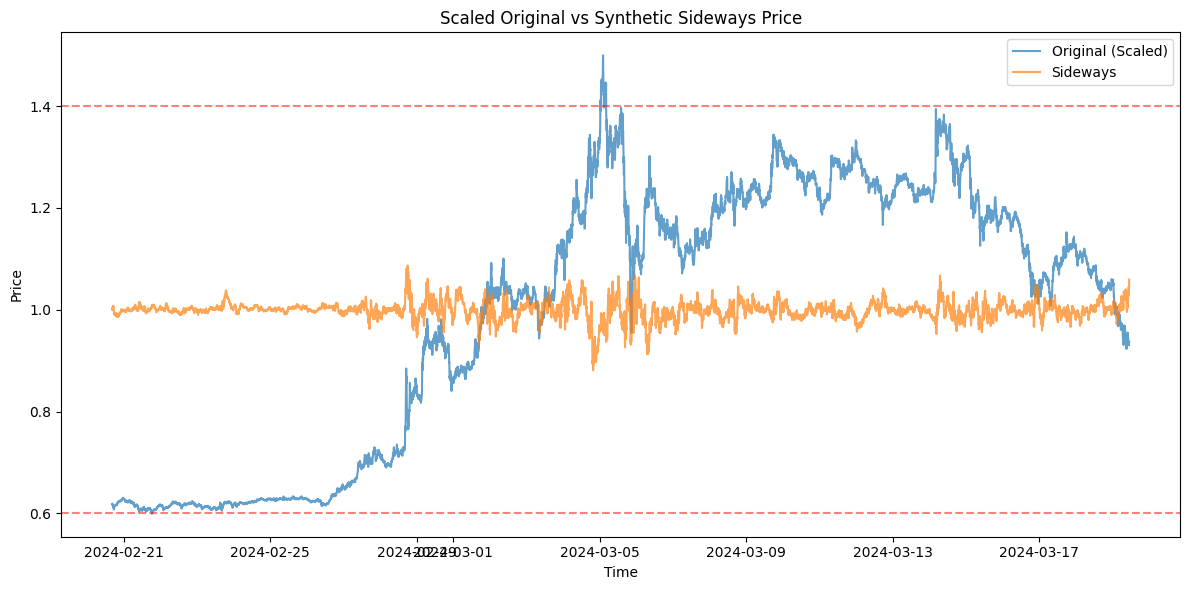

In [3]:
from src.generate import sideways

sideways.create_sideways_data('DOGE_5m_sideways',data[0], 1, 8000)